In [1]:
import numpy as np # numerical computing
import pandas as pd # data analysis, working with DataFrames
import matplotlib.pyplot as plt # visualizations
import seaborn as sns # visulizations ++
import nltk #natural lang tool kit

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\spam.csv",encoding="latin1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df=df.rename(columns={"v1":"label","v2":"text"})
df['label_in_num'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,text,label_in_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<AxesSubplot:xlabel='label', ylabel='count'>

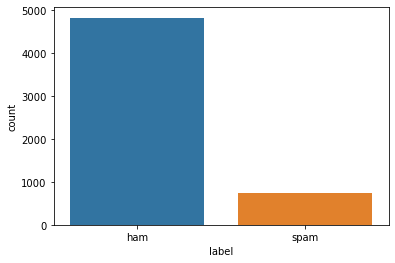

In [5]:
sns.countplot(x=df['label'])

In [6]:
print(" no of rows", len(df))

 no of rows 5572


In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
df.describe()

,label_in_num
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         5572 non-null   object
 1   text          5572 non-null   object
 2   label_in_num  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [10]:
df.isnull().sum()

label           0
text            0
label_in_num    0
dtype: int64

In [11]:
df['length']=df['text'].apply(len)
df.head()

,label,text,label_in_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [12]:
X=df.text
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [13]:
Y=df.label
Y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [14]:
Y.replace(to_replace='ham',value=1,inplace=True)
Y.replace(to_replace='spam',value=0,inplace=True)
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: int64

In [15]:
Y=df.label
Y.value_counts()

1    4825
0     747
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='Count'>

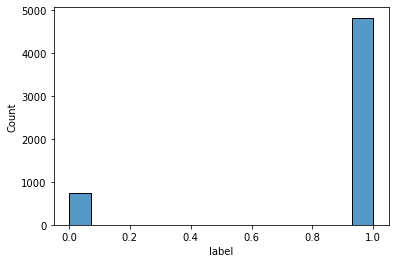

In [16]:
sns.histplot(Y)

<AxesSubplot:ylabel='Frequency'>

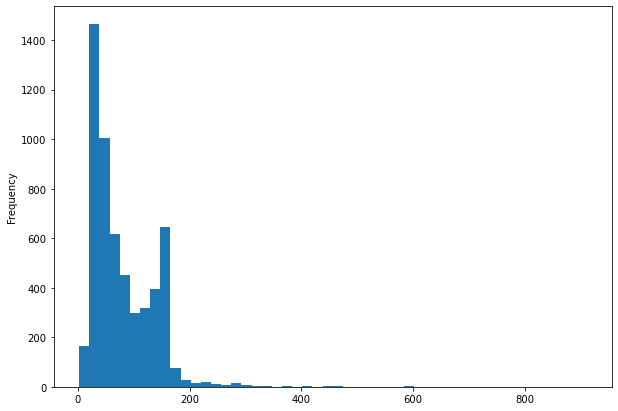

In [17]:
df['length'].plot(bins=50, kind='hist',figsize=(10,7))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

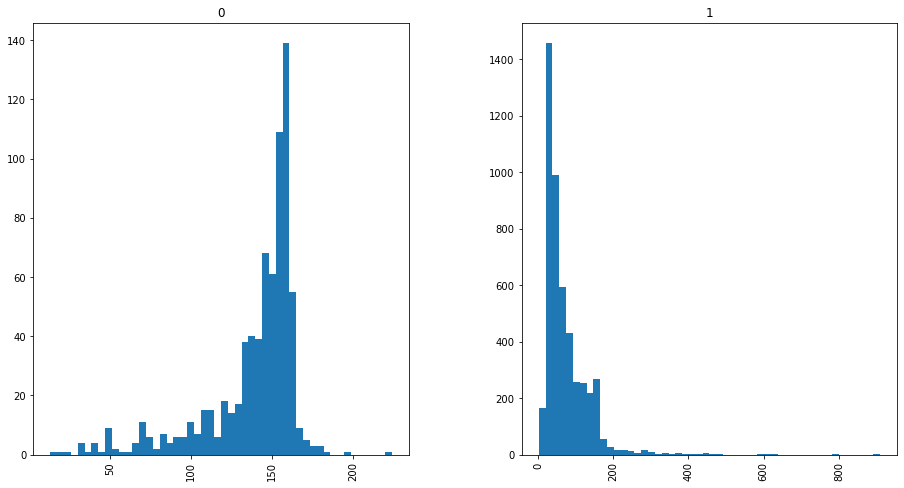

In [18]:
df.hist(column='length', by='label', bins=50, figsize=(15,8))

In [19]:
count=CountVectorizer()
input=['REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode']

text=count.fit_transform(df['text'])

x_train, x_test, y_train, y_test= train_test_split(text, df['label'], test_size=0.20, random_state=1)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [20]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


In [21]:
model=MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [22]:
prediction=model.predict(x_test)
print(prediction)

[1 1 1 ... 1 1 1]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9937219730941704
Precision score: 0.9928789420142421
Recall score: 1.0
F1 score: 0.9964267483409903


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9937219730941704
Precision score: 0.9928789420142421
Recall score: 1.0
F1 score: 0.9964267483409903


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLP Classifier")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.9937219730941704
Precision score: 0.9928789420142421
Recall score: 1.0
F1 score: 0.9964267483409903


In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.9,random_state=25)

In [27]:
email= pd.concat([x_train, y_train], axis=1)

# separate minority and majority classes
Spam = email[email.label==0]
Ham = email[email.label==1]

In [28]:
Spam

,text,label
3583,Hi 07734396839 IBH Customer Loyalty Offer: The...,0
954,Filthy stories and GIRLS waiting for your,0
1713,Hard LIVE 121 chat just 60p/min. Choose your g...,0
1121,Do you want 750 anytime any network mins 150 t...,0
417,FREE entry into our å£250 weekly competition j...,0
...,...,...
2574,Your next amazing xxx PICSFREE1 video will be ...,0
1491,Your account has been credited with 500 FREE T...,0
1457,CLAIRE here am havin borin time & am now alone...,0
4861,**FREE MESSAGE**Thanks for using the Auction S...,0


In [29]:
Ham

,text,label
778,Happy New year my dear brother. I really do mi...,1
5444,Good morning. At the repair shop--the ONLY rea...,1
4114,Sorry. You never hear unless you book it. One ...,1
3229,I feel like a dick because I keep sleeping thr...,1
3180,So many people seems to be special at first si...,1
...,...,...
1175,Horrible u eat macs eat until u forgot abt me ...,1
255,Don't necessarily expect it to be done before ...,1
2934,"Yeah, we got one lined up for us",1
2191,Thankyou so much for the call. I appreciate yo...,1
